### K-Means Clustering

Problem Statement : Built a K-Mean Cluster Profile For the Universities 

Dataset --> Universities.csv

In [1]:
#Loading the Required Libary
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")  #--to ignore warnings

In [2]:
#Loading the Dataset
Univ = pd.read_csv("C:/Users/Akaash/Downloads/Universities.csv")
Univ.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


#### Standardization Function

In [3]:
# Standardization function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#Fillting the Standardize Value and Droping the 'Univ' column as it is categorial
scaled_Univ_df = scaler.fit_transform(Univ.iloc[:,1:])

In [4]:
#Checking The Standardize Value
scaled_Univ_df

array([[ 0.41028362,  0.6575195 , -0.88986682,  0.07026045, -0.33141256,
         0.82030265],
       [ 1.39925928,  1.23521235, -0.73465749, -1.68625071,  2.56038138,
        -0.64452351],
       [-0.06065717, -0.76045386,  1.02438157, -0.93346022, -0.16712136,
        -1.65863393],
       [ 0.41028362, -0.02520842, -0.78639393, -0.18066972,  0.29164871,
         0.14422904],
       [ 0.12771914,  0.34241431, -0.32076595,  0.07026045, -0.39084607,
         0.36958691],
       [ 0.69284809,  0.6575195 , -0.83813038, -0.68253005,  0.33778044,
         0.93298158],
       [ 0.4573777 ,  0.71003703, -0.47597528, -0.18066972,  0.29695528,
         0.93298158],
       [-0.10775125, -0.13024348, -0.78639393, -0.18066972, -0.51381683,
         0.59494478],
       [ 1.25797704,  0.76255456, -1.30375836, -0.43159988,  0.85874344,
         1.15833946],
       [ 0.36318954, -0.07772595,  0.24833493, -1.43532055,  2.21481798,
         0.0315501 ],
       [ 1.06960072,  0.92010716, -0.47597528, -0.

#### Elbow Graph / scree plot
How to find optimum number of  cluster

The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

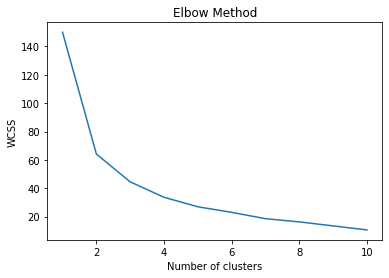

In [5]:
#wcss- within cluster sum of square
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0) # will start at 0(randam_state)
    kmeans.fit(scaled_Univ_df)
    wcss.append(kmeans.inertia_)
 
#Plotting the Elbow Graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Inference: the optimum value of K would be 3,4,or 6 as it can been through figure

In [6]:
#Checking the Wcss 
wcss

[149.99999999999997,
 64.1452839501027,
 44.531761731450956,
 33.654341806512235,
 26.953681627883103,
 23.028199078329926,
 18.568917030859872,
 16.301664640974554,
 13.47880438976081,
 10.64054544753914]

inference: As it can be seen after first Partition within cluster sum of square i.e. variabilty decrease Drastically after that third or fourth parition it decrease very less so we can consider 3 or 4 as k value

#### Building Cluster algorithm

In [7]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(3, random_state=42)
clusters_new.fit(scaled_Univ_df)

KMeans(n_clusters=3, random_state=42)

In [8]:
#Fetching the cluster by its labels
clusters_new.labels_

array([2, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 1, 0, 1, 0, 1, 2, 2, 2, 2,
       2, 1, 0])

In [9]:
#these are standardized values.
clusters_new.cluster_centers_

array([[ 0.90738779,  0.73921344, -0.76914845, -0.76617344,  0.97562148,
         0.61998454],
       [-1.93029211, -1.98148647,  1.59348244,  1.63857398, -1.23359906,
        -1.68680366],
       [-0.03711013,  0.10608541,  0.04570052,  0.02843875, -0.32051642,
         0.09727948]])

#### The Cluster Profiling

In [10]:
#Assign clusters to the data set
Univ['clusterid_new'] = clusters_new.labels_
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clusterid_new
0,Brown,1310,89,22,13,22704,94,2
1,CalTech,1415,100,25,6,63575,81,0
2,CMU,1260,62,59,9,25026,72,2
3,Columbia,1310,76,24,12,31510,88,2
4,Cornell,1280,83,33,13,21864,90,2
5,Dartmouth,1340,89,23,10,32162,95,0
6,Duke,1315,90,30,12,31585,95,0
7,Georgetown,1255,74,24,12,20126,92,2
8,Harvard,1400,91,14,11,39525,97,0
9,JohnsHopkins,1305,75,44,7,58691,87,0


In [11]:
Univ.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,SAT,Top10,Accept,SFRatio,Expenses,GradRate
,,mean,mean,mean,mean,mean,mean
0,0,1362.777778,90.555556,24.333333,9.666667,41176.888889,92.222222
1,1,1061.500000,38.750000,70.000000,19.250000,9953.000000,71.750000
2,2,1262.500000,78.500000,40.083333,12.833333,22858.000000,87.583333


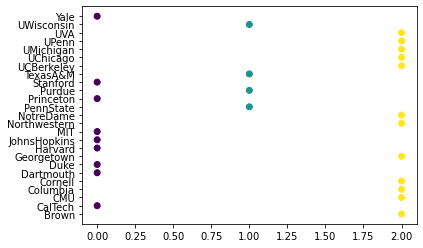

In [12]:
#Plot of Clusters
plt.figure(figsize = (6,4))
plt.scatter(Univ['clusterid_new'],Univ['Univ'], c = clusters_new.labels_)

### Normalization function

Now Using the Normalization Function to use Difference between before cluster and the new cluster that would be built now afer Normalizing

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1)) # Giving 0,1 through MinMaxScaler as Normalization values are 0,1

#Fitting the Normalize Value and Droping the 'Univ' column as it is categorial
rescaledX = scaler.fit_transform(Univ.iloc[:,1:])

In [14]:
#Checking The Standardize Value
rescaledX

array([[0.74390244, 0.84722222, 0.10526316, 0.36842105, 0.25514388,
        0.9       , 1.        ],
       [1.        , 1.        , 0.14473684, 0.        , 1.        ,
        0.46666667, 0.        ],
       [0.62195122, 0.47222222, 0.59210526, 0.15789474, 0.29746132,
        0.16666667, 1.        ],
       [0.74390244, 0.66666667, 0.13157895, 0.31578947, 0.41562939,
        0.7       , 1.        ],
       [0.67073171, 0.76388889, 0.25      , 0.36842105, 0.23983525,
        0.76666667, 1.        ],
       [0.81707317, 0.84722222, 0.11842105, 0.21052632, 0.4275118 ,
        0.93333333, 0.        ],
       [0.75609756, 0.86111111, 0.21052632, 0.31578947, 0.41699623,
        0.93333333, 0.        ],
       [0.6097561 , 0.63888889, 0.13157895, 0.31578947, 0.20816096,
        0.83333333, 1.        ],
       [0.96341463, 0.875     , 0.        , 0.26315789, 0.56169926,
        1.        , 0.        ],
       [0.73170732, 0.65277778, 0.39473684, 0.05263158, 0.91099123,
        0.66666667, 0. 

#### Elbow Graph / scree plot
How to find optimum number of  cluster

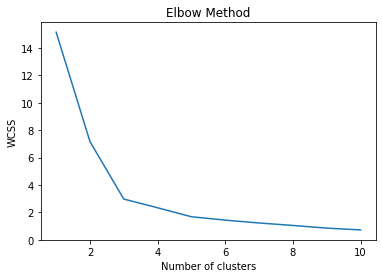

In [15]:
#wcss- within cluster sum of square
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0) # will start at 0(randam_state)
    kmeans.fit(rescaledX)
    wcss.append(kmeans.inertia_)
 
#Plotting the Elbow Graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [16]:
wcss

[15.148235196638558,
 7.1620440411053,
 2.9680293029536573,
 2.333609503348098,
 1.6781326840746351,
 1.4320118047058643,
 1.2231191711566012,
 1.0421597663891968,
 0.8478221520781072,
 0.7170697045095753]

#### Building Cluster algorithm

In [17]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(3, random_state=42)
clusters_new.fit(rescaledX)

KMeans(n_clusters=3, random_state=42)

In [18]:
#Fetching the cluster by its labels
clusters_new.labels_

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 2, 0, 2, 0, 2, 1, 1, 1, 1,
       1, 2, 0])

In [19]:
#these are standardized values.
clusters_new.cluster_centers_

array([[0.87262873, 0.86882716, 0.13596491, 0.19298246, 0.59180421,
        0.84074074, 0.        ],
       [0.62804878, 0.70138889, 0.34320175, 0.35964912, 0.25795047,
        0.68611111, 1.        ],
       [0.13780488, 0.14930556, 0.73684211, 0.69736842, 0.02276248,
        0.15833333, 0.5       ]])

#### The Cluster Profiling

In [20]:
#Assign clusters to the data set
Univ['clusterid_new'] = clusters_new.labels_
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clusterid_new
0,Brown,1310,89,22,13,22704,94,1
1,CalTech,1415,100,25,6,63575,81,0
2,CMU,1260,62,59,9,25026,72,1
3,Columbia,1310,76,24,12,31510,88,1
4,Cornell,1280,83,33,13,21864,90,1
5,Dartmouth,1340,89,23,10,32162,95,0
6,Duke,1315,90,30,12,31585,95,0
7,Georgetown,1255,74,24,12,20126,92,1
8,Harvard,1400,91,14,11,39525,97,0
9,JohnsHopkins,1305,75,44,7,58691,87,0


In [21]:
Univ.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,SAT,Top10,Accept,SFRatio,Expenses,GradRate
,,mean,mean,mean,mean,mean,mean
0,0,1362.777778,90.555556,24.333333,9.666667,41176.888889,92.222222
1,1,1262.500000,78.500000,40.083333,12.833333,22858.000000,87.583333
2,2,1061.500000,38.750000,70.000000,19.250000,9953.000000,71.750000


##### Inference: It Switches the Values For Cluster when we use MinMax Scaler(Normalization) instead of Standard Scaler(Standardization).

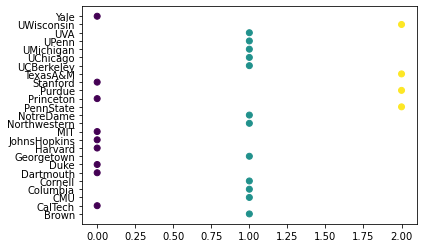

In [22]:
#Plot of Clusters
plt.figure(figsize = (6,4))
plt.scatter(Univ['clusterid_new'],Univ['Univ'], c = clusters_new.labels_)